In [0]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline

In [0]:
nb_classes = 10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

170500096/170498071 [==============================] - 12s 0us/step
X_train original shape (50000, 32, 32, 3)
y_train original shape (50000, 1)


In [0]:
!ls

sample_data


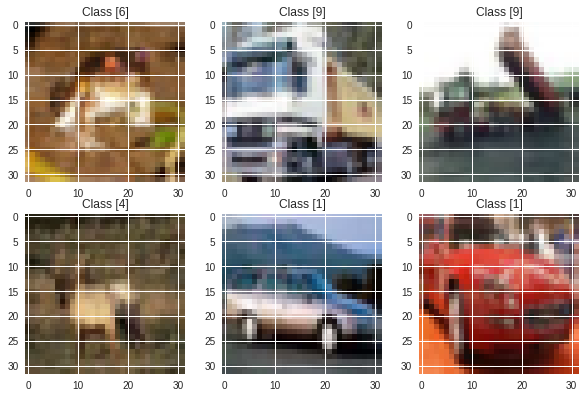

In [0]:
plt.rcParams['figure.figsize'] = (10,10) 

for i in range(6):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [0]:
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training shape", X_train.shape)
print("Testing shape", X_test.shape)

Training shape (50000, 32, 32, 3)
Testing shape (10000, 32, 32, 3)


In [0]:
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

# CNN Model

In [0]:
input_tensor = Input(shape = (32,32,3))
conv1 = Conv2D(32, kernel_size=3,activation = 'relu')(input_tensor)
conv2 = Conv2D(32, kernel_size=3,activation = 'relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
drop1 = Dropout(0.25)(pool1)
conv3 = Conv2D(64, kernel_size=3,activation = 'relu')(drop1)
conv4 = Conv2D(64, kernel_size=3,activation = 'relu')(conv3)
pool2 = MaxPooling2D(pool_size=(2,2))(conv4)
drop2 = Dropout(0.25)(pool2)

flatten_layer = Flatten()(drop2)

hidden_layer = Dense(512 , activation = 'relu')(flatten_layer)
drop_layer = Dropout(0.5)(hidden_layer)
pred = Dense(10, activation = 'softmax')(drop_layer)

model = Model(inputs = input_tensor, outputs = pred)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10,
          verbose=1, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 7s 184us/step - loss: 1.6862 - acc: 0.3795 - val_loss: 1.4015 - val_acc: 0.4945
Epoch 2/10
40000/40000 [==============================] - 6s 141us/step - loss: 1.3577 - acc: 0.5079 - val_loss: 1.2422 - val_acc: 0.5567
Epoch 3/10
40000/40000 [==============================] - 6s 143us/step - loss: 1.2162 - acc: 0.5674 - val_loss: 1.0892 - val_acc: 0.6186
Epoch 4/10
40000/40000 [==============================] - 6s 142us/step - loss: 1.1112 - acc: 0.6057 - val_loss: 1.0178 - val_acc: 0.6412
Epoch 5/10
40000/40000 [==============================] - 6s 142us/step - loss: 1.0277 - acc: 0.6374 - val_loss: 0.9335 - val_acc: 0.6752
Epoch 6/10
40000/40000 [==============================] - 6s 142us/step - loss: 0.9591 - acc: 0.6642 - val_loss: 0.8976 - val_acc: 0.6870
Epoch 7/10
40000/40000 [==============================] - 6s 142us/step - loss: 0.9167 - acc: 0.6783 - val_loss: 0.8475 - 

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.8333488796234131
Test accuracy: 0.7113


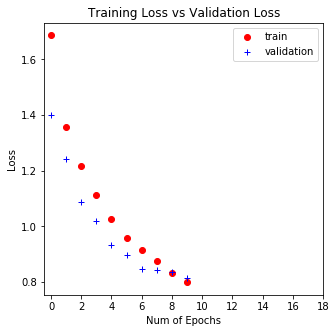

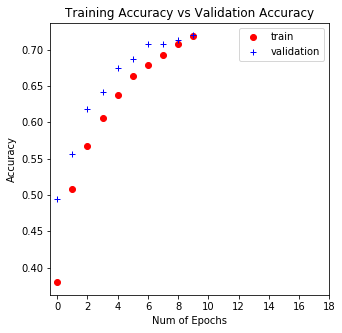

In [0]:
plt.rcParams['figure.figsize'] = (5,5)  
plt.figure(0)
plt.plot(history.history['loss'],'ro')
plt.plot(history.history['val_loss'],'b+')
plt.xticks(np.arange(0, 20, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.rcParams['figure.figsize'] = (5,5) 
plt.figure(1)
plt.plot(history.history['acc'],'ro')
plt.plot(history.history['val_acc'],'b+')
plt.xticks(np.arange(0, 20, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.show()

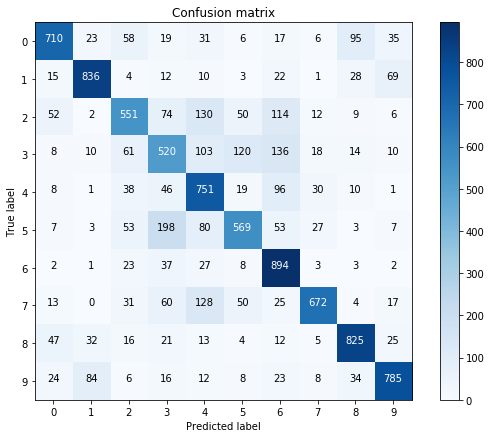

In [0]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix',cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

# Inspecting output

In [0]:
predicted = model.predict(X_test)
predicted_classes = np.argmax(predicted,axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

/home/chanatipsaetia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/chanatipsaetia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


In [0]:
plt.rcParams['figure.figsize'] = (7,7) 
plt.figure()
for i, correct in enumerate(correct_indices[:1]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct], cmap='viridis', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

# Data augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# Inspecting data

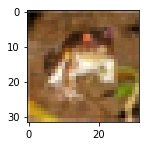

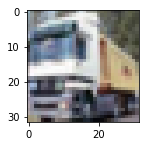

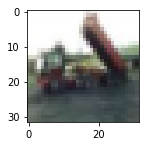

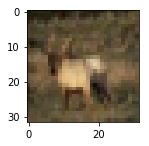

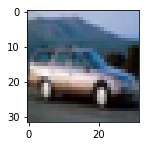

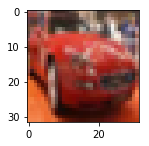

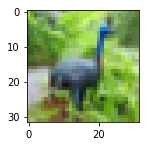

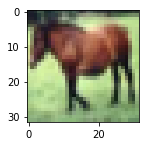

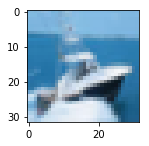

In [0]:
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()

In [0]:
datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=False,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train_splt, X_val, y_train_splt, y_val = train_test_split(X_train, y_train, train_size=0.8) 

/home/chanatipsaetia/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
datagen.fit(X_train_splt)

# Inspecting data augmentation

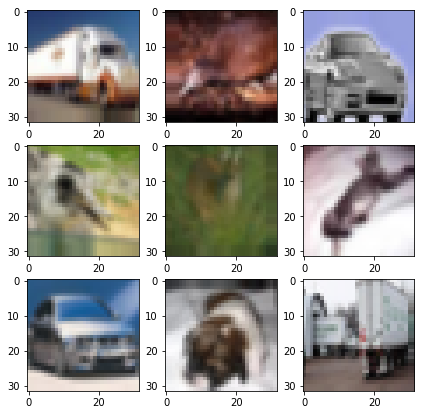

In [0]:
for X_batch, y_batch in datagen.flow(X_train_splt, y_train_splt, batch_size=128):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i], cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

In [0]:
history_2 = model.fit_generator(datagen.flow(X_train_splt, y_train_splt, batch_size = 128), epochs=10,
            verbose=1,validation_data=(X_val, y_val))

Epoch 1/10
313/313 [==============================] - 18s 56ms/step - loss: 1.0224 - acc: 0.6413 - val_loss: 0.7060 - val_acc: 0.7596
Epoch 2/10
313/313 [==============================] - 17s 53ms/step - loss: 0.9855 - acc: 0.6515 - val_loss: 0.7282 - val_acc: 0.7479
Epoch 3/10
313/313 [==============================] - 17s 54ms/step - loss: 0.9708 - acc: 0.6604 - val_loss: 0.7405 - val_acc: 0.7447
Epoch 4/10
313/313 [==============================] - 16s 52ms/step - loss: 0.9508 - acc: 0.6675 - val_loss: 0.7317 - val_acc: 0.7476
Epoch 5/10
313/313 [==============================] - 17s 53ms/step - loss: 0.9268 - acc: 0.6744 - val_loss: 0.7560 - val_acc: 0.7341
Epoch 6/10
313/313 [==============================] - 17s 54ms/step - loss: 0.9084 - acc: 0.6821 - val_loss: 0.7744 - val_acc: 0.7298
Epoch 7/10
313/313 [==============================] - 17s 54ms/step - loss: 0.9103 - acc: 0.6819 - val_loss: 0.6815 - val_acc: 0.7644
Epoch 8/10
313/313 [==============================] - 17s 53ms

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.7352188352584839
Test accuracy: 0.7472
